In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Set up seaborn
sns.set_theme(style="whitegrid")


In [2]:
import os
DATASET_PATH = r"C:\Users\dmytr\dataset\wikipedia_dataset1"

# List top-level folders in the dataset directory
folders = os.listdir(DATASET_PATH)
print("Top-level folders in dataset directory:", folders)

# Count total number of files recursively
total_files = sum([len(files) for r, d, files in os.walk(DATASET_PATH)])
print("Total number of files in dataset directory:", total_files)

Top-level folders in dataset directory: ['data.yaml', 'test', 'train', 'valid']
Total number of files in dataset directory: 13501


In [3]:
def load_data(split, dataset_path):
    images_path = os.path.join(dataset_path, split, 'images')
    labels_path = os.path.join(dataset_path, split, 'labels')
    data = []
    # Iterate over each label file in the labels directory
    for label_file in os.listdir(labels_path):
        if not label_file.endswith('.txt'):
            continue
        label_path = os.path.join(labels_path, label_file)
        # Skip empty label files
        if os.path.getsize(label_path) == 0:
            print(f"Skipping empty label file: {label_path}")
            continue
        # Extract numeric index from filename, e.g. "image_0.txt" → "0"
        try:
            index = label_file.split('_')[1].split('.')[0]
        except Exception as e:
            print(f"Error parsing label filename {label_file}: {e}")
            continue
        image_file = f"image_{index}.jpg"
        image_path = os.path.join(images_path, image_file)
        if not os.path.exists(image_path):
            print(f"Image file not found: {image_path}")
            continue
        img = cv2.imread(image_path)
        if img is None:
            print(f"Unable to read image: {image_path}")
            continue
        height_img, width_img, _ = img.shape
        with open(label_path, 'r') as f:
            lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                print(f"Skipping malformed line in {label_file}: {line.strip()}")
                continue
            try:
                class_id = int(parts[0])
                bbox_values = list(map(float, parts[1:]))
            except Exception as e:
                print(f"Error parsing values in {label_file}: {e}")
                continue
            data.append({
                'image_path': image_path,
                'filename': image_file,
                'class_id': class_id,
                'center_x': bbox_values[0],
                'center_y': bbox_values[1],
                'width': bbox_values[2],
                'height': bbox_values[3],
                'split': split
            })
    if data:
        return pd.DataFrame(data)
    else:
        print(f"No valid data found for split: {split}")
        return pd.DataFrame()

In [5]:
train_data = load_data('train', DATASET_PATH)
val_data = load_data('valid', DATASET_PATH)
test_data = load_data('test', DATASET_PATH)

all_data = pd.concat([train_data, val_data, test_data], ignore_index=True)
print("Combined data shape:", all_data.shape)
all_data.head()

Combined data shape: (6750, 8)


,image_path,filename,class_id,center_x,center_y,width,height,split
0,C:\Users\dmytr\dataset\wikipedia_dataset1\trai...,image_10.jpg,1,0.500823,0.497873,0.582909,0.659805,train
1,C:\Users\dmytr\dataset\wikipedia_dataset1\trai...,image_100.jpg,16,0.498849,0.498959,0.571969,0.514174,train
2,C:\Users\dmytr\dataset\wikipedia_dataset1\trai...,image_1000.jpg,19,0.498958,0.498821,0.493750,0.488208,train
3,C:\Users\dmytr\dataset\wikipedia_dataset1\trai...,image_1001.jpg,19,0.498958,0.498821,0.493750,0.488208,train
4,C:\Users\dmytr\dataset\wikipedia_dataset1\trai...,image_1002.jpg,19,0.500515,0.498437,0.628367,0.676434,train


In [6]:
import pandas as pd

# Assuming df is your DataFrame
print("Checking for NaN values:")
print(all_data.isnull().sum())  # Check for NaN values in each column

# Alternatively, check for any NaN values in the entire DataFrame
if all_data.isnull().values.any():
    print("DataFrame contains NaN values.")

# Drop rows with any NaN values
df_cleaned = all_data.dropna()

# If you want to drop columns with NaN values instead of rows, use axis=1
# df_cleaned = df.dropna(axis=1)

print("Number of rows after removing NaN values:", len(df_cleaned))

Checking for NaN values:
image_path    0
filename      0
class_id      0
center_x      0
center_y      0
width         0
height        0
split         0
dtype: int64
Number of rows after removing NaN values: 6750


In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame

# 1. Identify duplicates
duplicates = all_data.duplicated()
print("Duplicate rows:")
print(all_data[duplicates])

# 2. Remove duplicates
all_data = all_data.drop_duplicates()

print("\nDataFrame after removing duplicates:")
print(all_data)


Duplicate rows:
Empty DataFrame
Columns: [image_path, filename, class_id, center_x, center_y, width, height, split]
Index: []

DataFrame after removing duplicates:
                                             image_path        filename  \
0     C:\Users\dmytr\dataset\wikipedia_dataset1\trai...    image_10.jpg   
1     C:\Users\dmytr\dataset\wikipedia_dataset1\trai...   image_100.jpg   
2     C:\Users\dmytr\dataset\wikipedia_dataset1\trai...  image_1000.jpg   
3     C:\Users\dmytr\dataset\wikipedia_dataset1\trai...  image_1001.jpg   
4     C:\Users\dmytr\dataset\wikipedia_dataset1\trai...  image_1002.jpg   
...                                                 ...             ...   
6745  C:\Users\dmytr\dataset\wikipedia_dataset1\test...    image_95.jpg   
6746  C:\Users\dmytr\dataset\wikipedia_dataset1\test...    image_96.jpg   
6747  C:\Users\dmytr\dataset\wikipedia_dataset1\test...    image_97.jpg   
6748  C:\Users\dmytr\dataset\wikipedia_dataset1\test...    image_98.jpg   
6749  C:\Us

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

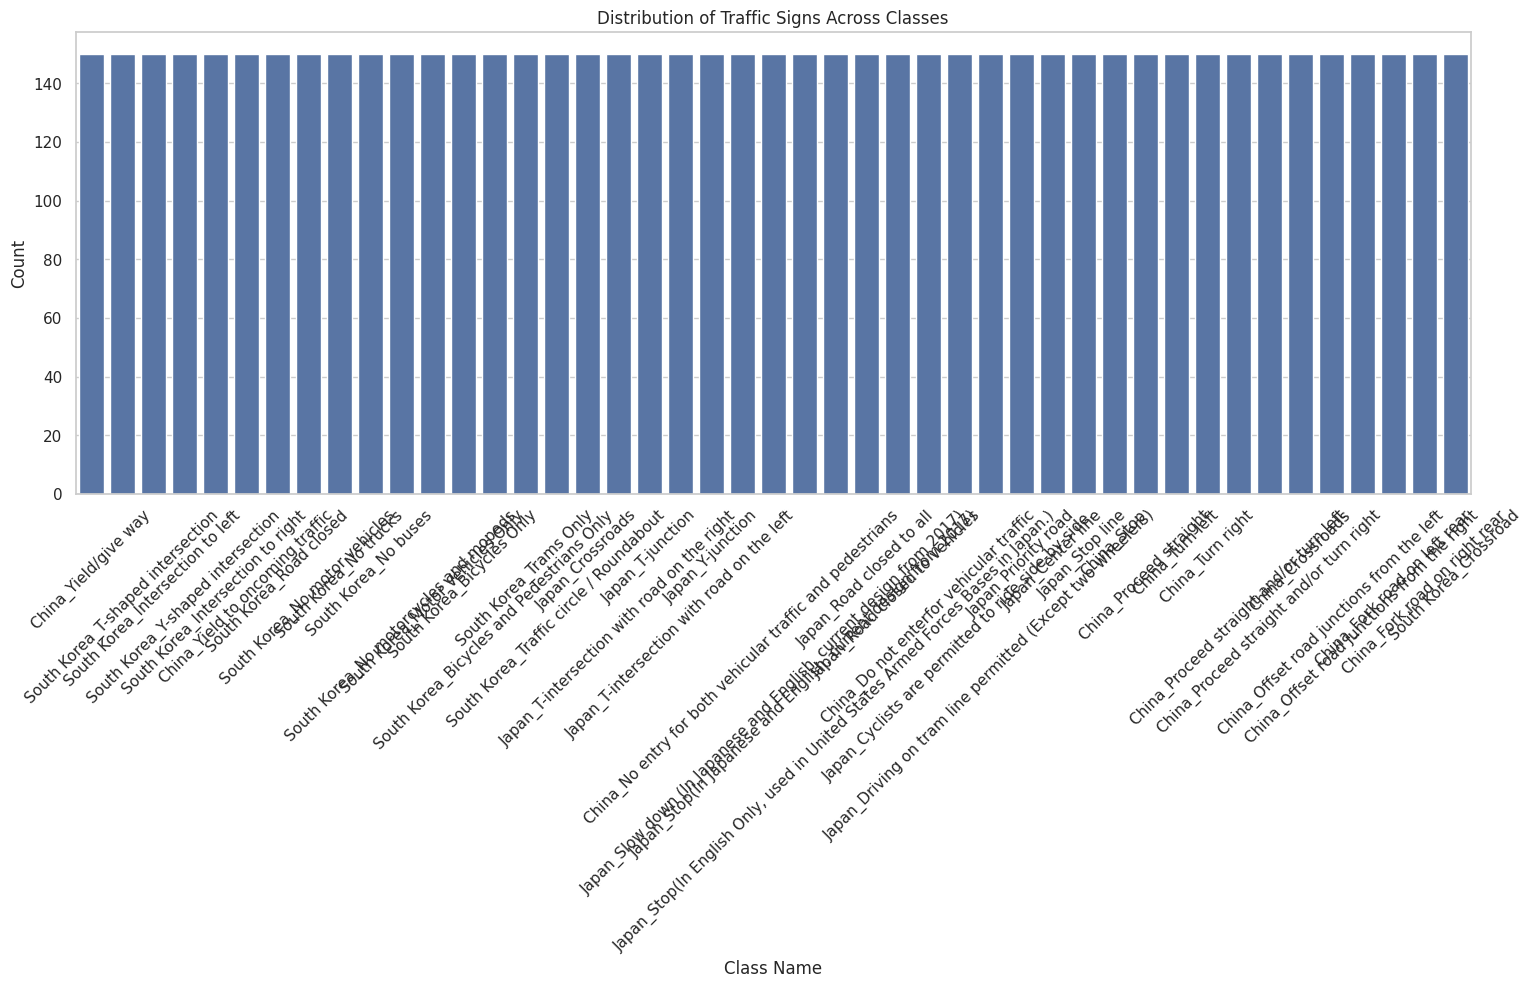

In [8]:
import yaml

data_yaml_path = os.path.join(DATASET_PATH, "data.yaml")
with open(data_yaml_path, "r", encoding="utf-8") as f:
    data_yaml_content = f.read()

data_yaml_dict = yaml.safe_load(open(data_yaml_path, "r", encoding="utf-8"))
class_names = data_yaml_dict.get("names", [])

# Create a mapping DataFrame and merge with all_data
class_mapping_df = pd.DataFrame({'class_id': list(range(len(class_names))), 'class_name': class_names})
all_data_with_names = pd.merge(all_data, class_mapping_df, on="class_id", how="left")
all_data_with_names.head()

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(18, 6))
sns.countplot(data=all_data_with_names, x='class_name', order=all_data_with_names['class_name'].value_counts().index)
plt.title('Distribution of Traffic Signs Across Classes')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

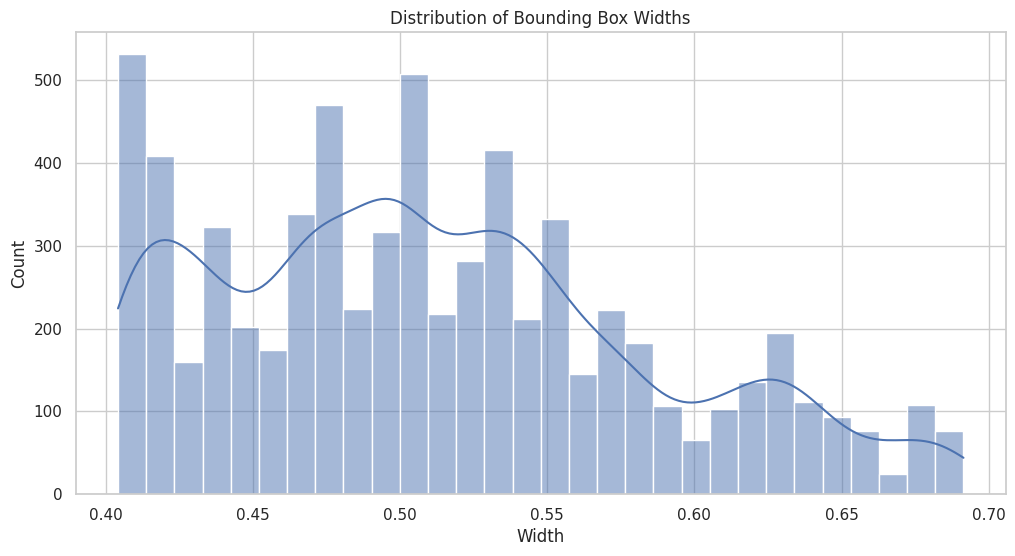

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

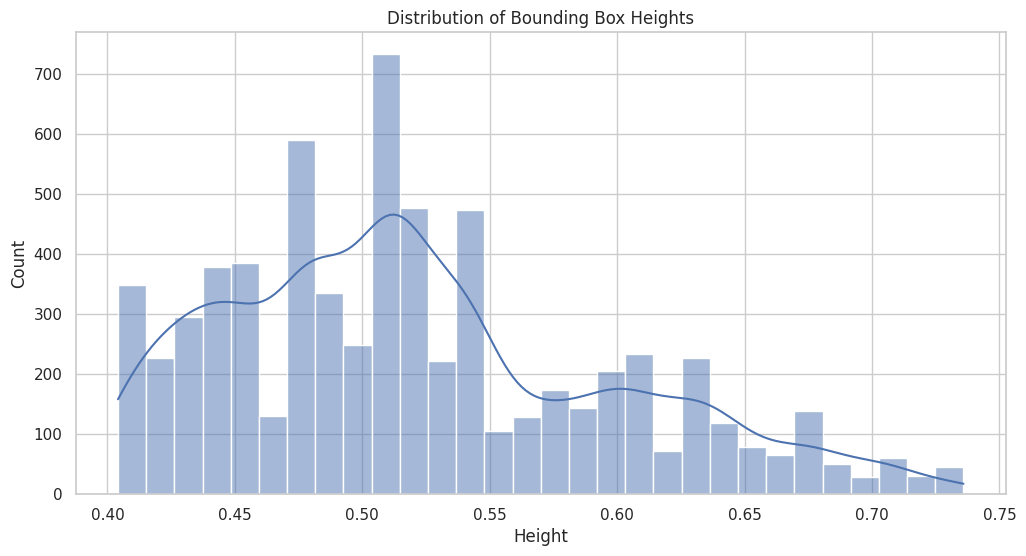

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data, x='width', bins=30, kde=True)
plt.title('Distribution of Bounding Box Widths')
plt.xlabel('Width')
plt.ylabel('Count')

plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=all_data, x='height', bins=30, kde=True)
plt.title('Distribution of Bounding Box Heights')
plt.xlabel('Height')

plt.ylabel('Count')
plt.show()


In [11]:
import os
import cv2
import pandas as pd

def preprocess_labels(dataset_path, split):
    """
    Preprocesses YOLO label files to ensure bounding box values are valid and normalized.

    Parameters:
    - dataset_path: Path to the dataset
    - split: 'train', 'valid', or 'test'

    Returns:
    - None (Modifies files in place)
    """
    images_path = os.path.join(dataset_path, split, 'images')
    labels_path = os.path.join(dataset_path, split, 'labels')

    # Iterate over each label file
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)

        # Skip non-txt files
        if not label_file.endswith('.txt'):
            continue

        # Check if the label file is empty
        if os.path.getsize(label_path) == 0:
            print(f"Skipping empty label file: {label_path}")
            continue

        # Extract label number from "label_<n>.txt"
        label_number = label_file.split('_')[1].split('.')[0]

        # Corresponding image file path
        image_file = f"image_{label_number}.jpg"
        image_path = os.path.join(images_path, image_file)

        # Ensure the corresponding image exists
        if not os.path.exists(image_path):
            print(f"Image file not found for {label_file}")
            continue

        # Read the image to get its dimensions
        img = cv2.imread(image_path)
        if img is None:
            print(f"Unable to read image: {image_path}")
            continue
        height_img, width_img, _ = img.shape

        # Read the label file
        with open(label_path, 'r') as f:
            lines = f.readlines()

        updated_lines = []

        for line in lines:
            parts = line.strip().split()

            # Skip malformed lines
            if len(parts) != 5:
                print(f"Skipping malformed line in {label_file}: {line.strip()}")
                continue

            class_id = int(float(parts[0]))  # Class ID
            bbox_values = list(map(float, parts[1:]))  # Bounding box values

            # Check if bbox values are within [0, 1] range
            if not (0 <= bbox_values[0] <= 1 and 0 <= bbox_values[1] <= 1 and
                    0 <= bbox_values[2] <= 1 and 0 <= bbox_values[3] <= 1):
                print(f"Invalid bbox values in {label_file}: {line.strip()}")
                continue

            # Normalize the bounding box coordinates (if not already normalized)
            normalized_bbox = {
                'class_id': class_id,
                'center_x': bbox_values[0],
                'center_y': bbox_values[1],
                'width': bbox_values[2],
                'height': bbox_values[3]
            }

            # Update the line with normalized values
            updated_line = f"{normalized_bbox['class_id']} {normalized_bbox['center_x']} {normalized_bbox['center_y']} {normalized_bbox['width']} {normalized_bbox['height']}\n"
            updated_lines.append(updated_line)

        # Save the updated label file
        with open(label_path, 'w') as f:
            f.writelines(updated_lines)


In [12]:
dataset_path = r'C:\Users\dmytr\dataset\wikipedia_dataset1'
preprocess_labels(dataset_path, 'train')
preprocess_labels(dataset_path, 'valid')
preprocess_labels(dataset_path, 'test')

In [13]:
import os

label_dir = r'C:\Users\dmytr\dataset\wikipedia_dataset1'

for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as f:
            contents = f.read().strip()
            if not contents:
                print(f"Empty label file: {label_file}")
            else:
                print(f"Label file {label_file} contains data.")

In [14]:
image_dir = r'C:\Users\dmytr\dataset\wikipedia_dataset1'
label_dir = r'C:\Users\dmytr\dataset\wikipedia_dataset1'

image_files = set([f.replace('.jpg', '') for f in os.listdir(image_dir) if f.endswith('.jpg')])
label_files = set([f.replace('.txt', '') for f in os.listdir(label_dir) if f.endswith('.txt')])

missing_labels = image_files - label_files
if missing_labels:
    print(f"Missing label files for the following images: {missing_labels}")
else:
    print("All images have corresponding label files.")

All images have corresponding label files.


In [19]:
import os

# Directories for images and labels
image_dir = r'C:\Users\dmytr\dataset\wikipedia_dataset1\test\images'
label_dir = r'C:\Users\dmytr\dataset\wikipedia_dataset1\test\labels'

# Supported file extensions for images and labels
image_ext = ['.jpg', '.jpeg', '.png']  # Adjust these based on your dataset
label_ext = '.txt'  # Adjust based on your label file extension

# Get the list of images
image_files = [f for f in os.listdir(image_dir) if os.path.splitext(f)[1].lower() in image_ext]

# Process images with corresponding labels
processed_images = []
missing_labels = []

for image_file in image_files:
    # Get the base name (without extension)
    base_name = os.path.splitext(image_file)[0]

    # Expected label file for the current image
    label_file = base_name + label_ext

    # Check if the corresponding label file exists
    if os.path.exists(os.path.join(label_dir, label_file)):
        # Process the image if the label file exists
        processed_images.append(image_file)
        # Add your image processing logic here
    else:
        # Record the missing label
        missing_labels.append(image_file)

# Print summary
print(f"Processed {len(processed_images)} images with labels.")
print(f"Missing label files for {len(missing_labels)} images: {missing_labels}")

# Optional: Write missing labels to a log file for future reference
with open('missing_labels_log.txt', 'w') as log_file:
    for missing in missing_labels:
        log_file.write(missing + '\n')


Processed 675 images with labels.
Missing label files for 0 images: []


In [21]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo_training_models/yolov8s.pt")

# Train the model
train_results = model.train(
    data=r"C:\Users\dmytr\dataset\wikipedia_dataset1\data.yaml",
    batch=14,  # Smaller batch size
    epochs=20,  # Increased epochs for better learning | 1 is for testing performance, must be set for 50
    imgsz=720,
    device=0,
    augment=True,  # Enable data augmentation
    lr0=0.02,  # Lower learning rate
)

# Evaluate model performance on the validation set
metrics = model.val()

WARNING Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\dmytr\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
New https://pypi.org/project/ultralytics/8.3.152 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.151  Python-3.10.11 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=14, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\dmytr\dataset\wikipedia_dataset1\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=

train: Scanning C:\Users\dmytr\dataset\wikipedia_dataset1\train\labels... 4725 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4725/4725 [00:02<00:00, 2360.35it/s]


train: New cache created: C:\Users\dmytr\dataset\wikipedia_dataset1\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.10.0 ms, read: 123.533.9 MB/s, size: 13.5 KB)


val: Scanning C:\Users\dmytr\dataset\wikipedia_dataset1\valid\labels... 1350 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1350/1350 [00:00<00:00, 1524.99it/s]


val: New cache created: C:\Users\dmytr\dataset\wikipedia_dataset1\valid\labels.cache
Plotting labels to runs\detect\train51\labels.jpg... 


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.02' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000204, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000546875), 63 bias(decay=0.0)
Image sizes 736 train, 736 val
Using 8 dataloader workers
Logging results to runs\detect\train51
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.23G       1.31      4.646      1.672         14        736: 100%|██████████| 338/338 [02:46<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.20it/s]


                   all       1350       1350      0.538      0.763      0.732      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.12G     0.8187      2.053      1.243         14        736: 100%|██████████| 338/338 [02:41<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]

                   all       1350       1350      0.784      0.865      0.886      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.13G     0.7055      1.535      1.153         12        736: 100%|██████████| 338/338 [03:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1350       1350      0.865      0.944      0.913      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.13G     0.6332      1.236      1.103         16        736: 100%|██████████| 338/338 [02:40<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.02it/s]

                   all       1350       1350       0.85      0.993      0.932      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.11G     0.5633      1.106      1.056         10        736: 100%|██████████| 338/338 [02:41<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.30it/s]

                   all       1350       1350      0.877      0.979      0.939      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.14G     0.5249     0.9935      1.032         18        736: 100%|██████████| 338/338 [02:40<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:19<00:00,  2.48it/s]

                   all       1350       1350      0.865      0.981      0.944      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.14G     0.4907     0.9427      1.016         10        736: 100%|██████████| 338/338 [02:41<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1350       1350      0.876      0.973      0.938      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.14G     0.4592      0.878     0.9952         11        736: 100%|██████████| 338/338 [02:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:34<00:00,  1.44it/s]

                   all       1350       1350      0.885      0.969      0.946      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.14G     0.4388     0.8501     0.9842         16        736: 100%|██████████| 338/338 [02:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:31<00:00,  1.58it/s]

                   all       1350       1350      0.904      0.948      0.947      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.29G     0.4116     0.7973     0.9691         19        736: 100%|██████████| 338/338 [02:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:27<00:00,  1.79it/s]

                   all       1350       1350      0.902      0.945      0.944       0.94


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.14G     0.2228     0.3396     0.8503          7        736: 100%|██████████| 338/338 [02:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.31it/s]

                   all       1350       1350      0.909      0.959      0.953      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.14G     0.2034      0.303     0.8317          7        736: 100%|██████████| 338/338 [02:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:34<00:00,  1.43it/s]

                   all       1350       1350      0.909      0.958      0.951      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.13G     0.1774     0.2721     0.8142          7        736: 100%|██████████| 338/338 [02:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:18<00:00,  2.65it/s]

                   all       1350       1350      0.921      0.966      0.957      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.14G     0.1659     0.2665     0.8085          7        736: 100%|██████████| 338/338 [02:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:37<00:00,  1.32it/s]

                   all       1350       1350      0.915      0.969      0.959      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.12G     0.1528     0.2436     0.7993          7        736: 100%|██████████| 338/338 [02:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:18<00:00,  2.59it/s]

                   all       1350       1350      0.894      0.992      0.954      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.14G     0.1336      0.224     0.7911          7        736: 100%|██████████| 338/338 [02:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:25<00:00,  1.95it/s]

                   all       1350       1350      0.918      0.965      0.957      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.14G     0.1222     0.2145     0.7894          7        736: 100%|██████████| 338/338 [02:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:18<00:00,  2.58it/s]

                   all       1350       1350      0.941      0.954      0.962      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.13G     0.1093      0.202     0.7834          7        736: 100%|██████████| 338/338 [02:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1350       1350       0.93      0.968      0.965      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.14G     0.1023     0.1941      0.779          7        736: 100%|██████████| 338/338 [02:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:19<00:00,  2.54it/s]

                   all       1350       1350      0.949      0.947      0.966      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.12G    0.09377     0.1887     0.7797          7        736: 100%|██████████| 338/338 [02:12<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]

                   all       1350       1350      0.944      0.954      0.969      0.967



20 epochs completed in 0.951 hours.
Optimizer stripped from runs\detect\train51\weights\last.pt, 22.6MB
Optimizer stripped from runs\detect\train51\weights\best.pt, 22.6MB

Validating runs\detect\train51\weights\best.pt...
Ultralytics 8.3.151  Python-3.10.11 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 72 layers, 11,142,999 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:32<00:00,  1.51it/s]
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Gene

                   all       1350       1350      0.942      0.954      0.966      0.965
            China_Stop         29         29      0.983          1      0.995      0.995
  China_Yield/give way         28         28      0.983          1      0.995      0.995
China_Yield to oncoming traffic         30         30          1          1      0.995      0.995
China_No entry for both vehicular traffic and pedestrians         28         28          1          1      0.995      0.995
China_Do not enterfor vehicular traffic         28         28      0.983          1      0.995      0.995
China_Proceed straight         30         30          1          1      0.995      0.995
       China_Turn left         38         38      0.671          1      0.877      0.877
      China_Turn right         31         31      0.945      0.419      0.829      0.829
China_Proceed straight and/or turn left         29         29      0.642          1       0.86       0.86
China_Proceed straight and/or tu

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Ultralytics 8.3.151  Python-3.10.11 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 72 layers, 11,142,999 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 210.547.3 MB/s, size: 16.4 KB)


val: Scanning C:\Users\dmytr\dataset\wikipedia_dataset1\valid\labels.cache... 1350 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1350/1350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:46<00:00,  2.09it/s]
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of t

                   all       1350       1350      0.942      0.954      0.967      0.965
            China_Stop         29         29      0.983          1      0.995      0.995
  China_Yield/give way         28         28      0.983          1      0.995      0.995
China_Yield to oncoming traffic         30         30          1          1      0.995      0.995
China_No entry for both vehicular traffic and pedestrians         28         28          1          1      0.995      0.995
China_Do not enterfor vehicular traffic         28         28      0.983          1      0.995      0.995
China_Proceed straight         30         30          1          1      0.995      0.995
       China_Turn left         38         38      0.671          1      0.877      0.877
      China_Turn right         31         31      0.945      0.419       0.79       0.79
China_Proceed straight and/or turn left         29         29      0.642          1       0.86       0.86
China_Proceed straight and/or tu

In [22]:
from ultralytics import YOLO

# 1. Load the trained model
model = YOLO(r"C:\Users\dmytr\dataset\runs\detect\train51\weights\best.pt")

# 2. Export the model
# model.export(
#     format="onnx",
#     imgsz=(720, 720), # or whatever you trained with
#     opset=12,           # use opset>=12 to support dynamic NMS
#     simplify=True,      # simplify the graph
#     dynamic=False,      # static size export
#     optimize=True,      # optimize the graph (optional but good)
#     nms=True,    # 🔥 critical: export with NMS
# )

model.export(
    format="onnx",
    imgsz=(720, 720),   # or whatever you trained with
    opset=12,           # use opset>=12 to support dynamic NMS
    simplify=True,      # simplify the graph
    dynamic=False,      # static size export
    optimize=True,      # optimize the graph (optional but good)
    nms=True,    # 🔥 critical: export with NMS
)


Ultralytics 8.3.151  Python-3.10.11 torch-2.4.1+cu124 CPU (AMD Ryzen 5 7535HS with Radeon Graphics)
WARNING imgsz=[720, 720] must be multiple of max stride 32, updating to [736, 736]
Model summary (fused): 72 layers, 11,142,999 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from 'C:\Users\dmytr\dataset\runs\detect\train51\weights\best.pt' with input shape (1, 3, 736, 736) BCHW and output shape(s) (1, 300, 6) (21.5 MB)
requirements: Ultralytics requirement ['onnxslim>=0.1.56'] not found, attempting AutoUpdate...
  Attempting uninstall: onnxslim
    Found existing installation: onnxslim 0.1.50
    Uninstalling onnxslim-0.1.50:
      Successfully uninstalled onnxslim-0.1.50

requirements: AutoUpdate success  6.2s
WARNING requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.56...
ONNX: export success  8.6s, saved as 'C:\Users\dmytr\dataset\runs\detect\train51\weights\best.onn

'C:\\Users\\dmytr\\dataset\\runs\\detect\\train51\\weights\\best.onnx'

In [23]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("C:\\Users\\dmytr\\dataset\\runs\\detect\\train51\\weights\\best.pt")  # Replace with the correct path to your trained model

# Run inference on the test images
results = model.predict(source="C:\\Users\\dmytr\\dataset\\wikipedia_dataset1\\test\\images", save=True)

# Print out the results
print(results)



image 1/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_0.jpg: 672x736 1 China_Crossroads, 52.6ms
image 2/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_1.jpg: 672x736 1 China_Offset road junctions from the right, 14.5ms
image 3/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_10.jpg: 672x736 1 South Korea_Crossroad, 16.4ms
image 4/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_100.jpg: 736x736 1 China_Proceed straight, 15.3ms
image 5/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_101.jpg: 672x736 1 China_Offset road junctions from the right, 15.4ms
image 6/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_102.jpg: 736x736 1 China_Turn left, 1 China_Turn right, 14.7ms
image 7/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_103.jpg: 672x736 1 South Korea_Y-shaped intersection, 14.4ms
image 8/675 C:\Users\dmytr\dataset\wikipedia_dataset1\test\images\image_104.jpg: 672x736 1 Ch

In [24]:
from ultralytics import YOLO

# Load the trained model (replace with the correct path)
model = YOLO("C:\\Users\\dmytr\\dataset\\runs\\detect\\train51\\weights\\best.pt")

# Use model.val to evaluate the model on your validation/test dataset.
# This method compares the predictions with ground truth annotations defined in data.yaml.
val_results = model.val(data="C:\\Users\\dmytr\\dataset\\wikipedia_dataset1\\data.yaml")

# Print out the evaluation metrics computed by model.val.
# These metrics include Precision, Recall, mAP@0.5, and mAP@0.5:0.95.
print("Precision:", val_results.box.map50)   # Mean Average Precision @ IoU=0.5 (often used as precision)
print("Recall:", val_results.box.map)        # mAP calculated over IoU=0.5:0.95 (often reflects recall)
print("mAP@0.5:", val_results.box.map50)     # mAP with IoU=0.5
print("mAP@0.5:0.95:", val_results.box.map)  # mAP with IoU=0.5 to 0.95

Ultralytics 8.3.151  Python-3.10.11 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 72 layers, 11,142,999 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 161.857.0 MB/s, size: 15.1 KB)


val: Scanning C:\Users\dmytr\dataset\wikipedia_dataset1\valid\labels.cache... 1350 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1350/1350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:23<00:00,  3.56it/s]
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of t

                   all       1350       1350      0.944      0.954      0.968      0.966
            China_Stop         29         29      0.982          1      0.995      0.995
  China_Yield/give way         28         28      0.981          1      0.995      0.995
China_Yield to oncoming traffic         30         30          1          1      0.995      0.995
China_No entry for both vehicular traffic and pedestrians         28         28      0.981          1      0.995      0.995
China_Do not enterfor vehicular traffic         28         28      0.981          1      0.995      0.995
China_Proceed straight         30         30          1          1      0.995      0.995
       China_Turn left         38         38      0.675          1      0.826      0.826
      China_Turn right         31         31      0.941      0.419      0.808      0.808
China_Proceed straight and/or turn left         29         29      0.641          1       0.82       0.82
China_Proceed straight and/or tu

In [14]:
# Inference script for exported ONNX model

import os
import time
import cv2
import numpy as np
import onnxruntime as ort
import yaml

# Load class names
DATA_DIR = r"C:/Users/dmytr/dataset/wikipedia_dataset1"
DATA_YAML = os.path.join(DATA_DIR, "data.yaml")

with open(DATA_YAML, 'r') as f:
    data = yaml.safe_load(f)
class_names = data['names']

# Load the ONNX model
MODEL_PATH = r"C:\\Users\\dmytr\\dataset\\runs\\detect\\train50\\weights\\best.onnx"

session = ort.InferenceSession(MODEL_PATH, providers=["CPUExecutionProvider"])
input_name = session.get_inputs()[0].name
input_shape = session.get_inputs()[0].shape
_, C, H, W = input_shape

# Preprocessing
def preprocess(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (W, H))
    img = img.astype(np.float32) / 255.0
    img = np.transpose(img, (2, 0, 1))
    img = img[None, ...]
    return img

# Postprocessing
def find_best(output, conf_thres=0.25):
    detections = output[0]  # shape: [num_boxes, 6] => [x1, y1, x2, y2, conf, class_id]
    best_conf = 0
    best_cls = -1
    for det in detections:
        conf = det[4]
        cls_id = int(det[5])
        if conf > best_conf and conf > conf_thres:
            best_conf = conf
            best_cls = cls_id
    if best_cls >= 0:
        return class_names[best_cls], best_conf
    else:
        return "Unknown", 0.0

# Validation images
val_dir = os.path.join(DATA_DIR, "test", "images")
val_images = [os.path.join(val_dir, f) for f in os.listdir(val_dir) if f.lower().endswith((".jpg", ".png"))][:10]

# Run Inference
print(f"{'Image':<30} {'Label':<20} {'Conf%':>6}   {'Time (ms)':>8}")
print("-" * 70)

for path in val_images:
    inp = preprocess(path)
    t0 = time.time()
    outputs = session.run(None, {input_name: inp})
    elapsed = (time.time() - t0) * 1000

    output_array = np.array(outputs[0])
    label, conf = find_best(output_array)

    print(f"{os.path.basename(path):<30} {label:<20} {conf*100:6.2f}%   {elapsed:8.1f}ms")


Image                          Label                 Conf%   Time (ms)
----------------------------------------------------------------------
image_0.jpg                    South Korea_Bicycles and Pedestrians Only  99.81%      113.5ms
image_1.jpg                    South Korea_Railway crossing  99.41%      162.1ms
image_10.jpg                   Japan_Stop(In Japanese and English, current design from 2017)  98.42%      115.6ms
image_100.jpg                  South Korea_Descending hill (10%)  88.97%      106.2ms
image_101.jpg                  China_Keep left side  58.96%      105.4ms
image_102.jpg                  China_Proceed straight and/or turn left  75.74%       92.7ms
image_103.jpg                  Japan_Y-junction      99.80%      102.5ms
image_104.jpg                  China_Crossroads      99.37%      100.3ms
image_105.jpg                  Japan_Winding road first curve to the left  69.96%      100.8ms
image_106.jpg                  South Korea_Right lane decrease / End of right